In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import mode

from sklearn.metrics import accuracy_score

In [2]:
product = pd.read_csv("Product.csv")
product.head()


,User ID,Gender,Age,EstimatedSalary,Purchased,Description,UnitPrice,Country,Quantity
0,15624510,Male,19,19000,0,WHITE HANGING HEART T-LIGHT HOLDER,2.55,United Kingdom,6
1,15810944,Male,35,20000,0,WHITE METAL LANTERN,3.39,United Kingdom,6
2,15668575,Female,26,43000,0,CREAM CUPID HEARTS COAT HANGER,2.75,United Kingdom,8
3,15603246,Female,27,57000,0,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,United Kingdom,6
4,15804002,Male,19,76000,0,RED WOOLLY HOTTIE WHITE HEART.,3.39,United Kingdom,6


In [3]:
# dropping user id and gender cols to make the model more accurate and simple to train
X = product.iloc[:,[8,3]]
X

,Quantity,EstimatedSalary
0,6,19000
1,6,20000
2,8,43000
3,6,57000
4,6,76000
...,...,...
395,211,41000
396,212,23000
397,213,20000
398,214,33000


In [4]:
Y = product.iloc[:,[4]]
Y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [5]:
def euclidean(x1,x2):
    distance = np.sqrt(np.sum(x1-x2)**2)
    return distance

In [6]:
def KNN(X_train, X_test, Y_train,y_test, k_val):
    y_bar = []
    for pt in X_test.to_numpy():
        distances_list = []
        for i in range(len(X_train)):
            distances_list.append(euclidean((np.array(X_train.iloc[i])), pt))

        distance_DT = pd.DataFrame(data= distances_list, columns=['distance'], index=Y_train.index)
        K_neighbors = distance_DT.sort_values(by = ['distance'], axis=0)[:k_val]

        labels = Y_train.loc[K_neighbors.index]

        majority = mode(labels).mode[0]

        y_bar.append(majority)
    return y_bar 

In [7]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)
np.shape(X_train)


(320, 2)

In [8]:
model = KNN(X_train,X_test,Y_train,Y_test, k_val=3)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18608\855673324.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority = mode(labels).mode[0]
C:\Users\KIIT\AppData\Local\Temp\ipykernel_18608\855673324.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority

In [9]:
accuracy_score(Y_test,model)

0.7

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18608\855673324.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority = mode(labels).mode[0]
C:\Users\KIIT\AppData\Local\Temp\ipykernel_18608\855673324.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority

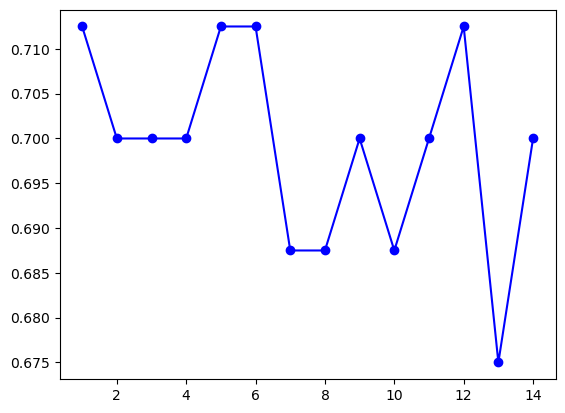

In [10]:
max_accuracy = []
for i in range(1,15):
    model = KNN(X_train,X_test,Y_train,Y_test, k_val=i)
    max_accuracy.append(accuracy_score(Y_test,model))

plt.plot(range(1,15), max_accuracy, color = 'blue', marker='o')

In [11]:
model2 = KNN(X_train,X_test,Y_train,Y_test, k_val=5)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_18608\855673324.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority = mode(labels).mode[0]
C:\Users\KIIT\AppData\Local\Temp\ipykernel_18608\855673324.py:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority

In [12]:
accuracy_score(Y_test,model2)

0.7125

<AxesSubplot:xlabel='Quantity', ylabel='EstimatedSalary'>

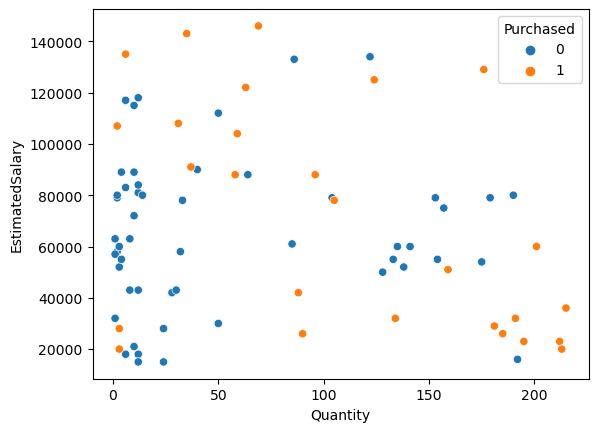

In [13]:
import seaborn as sns
sns.scatterplot(data= product, x = X_test['Quantity'], y = X_test['EstimatedSalary'], hue= 'Purchased')